In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://s3.amazonaws.com/filtereddatasets/Wine_Dine/winequality-red.csv")
data1 = pd.read_csv("https://s3.amazonaws.com/filtereddatasets/Wine_Dine/winequality-white.csv")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
#Studying Red Wine Dataset
print(data.head())
print("Rows, columns :"+ str(data.shape))
data.describe()
print(data.info())


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
Rows, columns :(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   flo

In [ ]:
#Handling nulls in Red Wine Dataset
print(data.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Handling Duplicates in Red Wine Dataset
print(data.duplicated().sum())
data=data.drop_duplicates(keep='first')
print(data.loc[data.duplicated(),:])
print("Rows, columns :" + str(data.shape))


240
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []
Rows, columns :(1359, 12)


In [ ]:
#Generating count of quality
print(data['quality'].value_counts())


5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


Text(0, 0.5, 'pH')

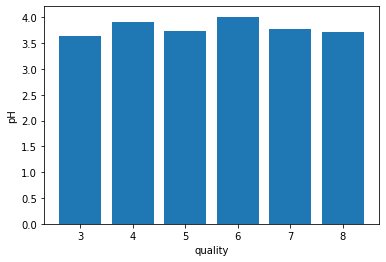

In [ ]:
#Vizualising Red Wine Dataset - Bar chart - quality vS pH
plt.bar(data['quality'], data['pH'])
plt.xlabel('quality')
plt.ylabel('pH')


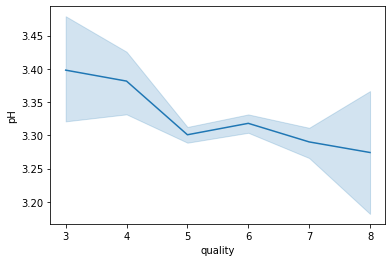

In [ ]:
#Visualising Red Wine Dataset - Line Chart - quality vS pH
sns.lineplot(data=data, x="quality", y ="pH")


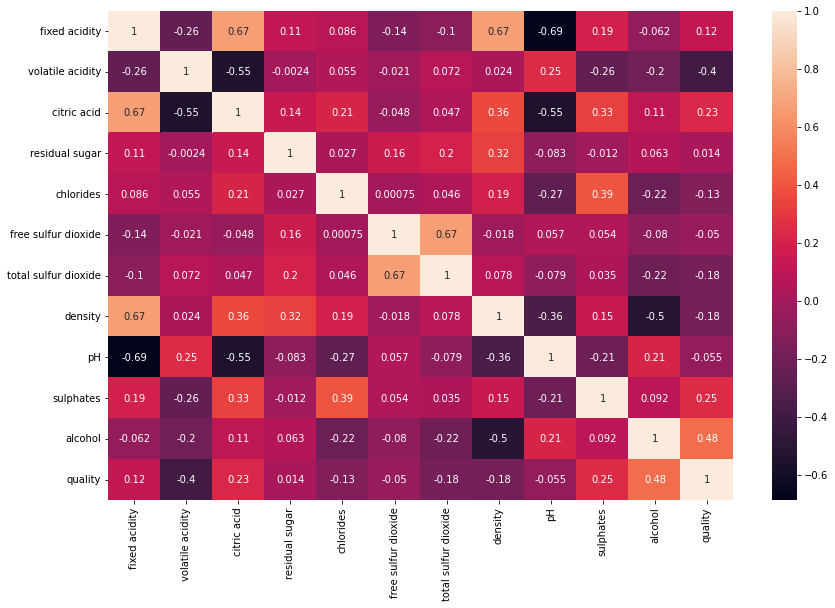

In [ ]:
#Vizualising Red Wine Dataset - Heat Map 
plt.figure(figsize=(14,9))
sns.heatmap(data.corr(), annot = True)

#No correlation between pH and quality of red wine as the value is -0.055 from the heat map.
#Also, the bar chart displays oscillating relationship with no steady increase or decrease


Text(0, 0.5, 'pH')

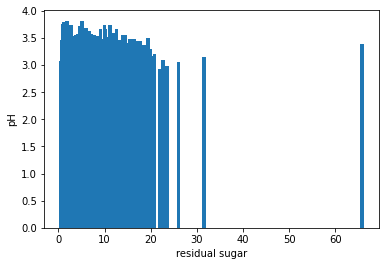

In [ ]:
#Vizualising White Wine Dataset - Bar chart - residual sugar vS pH
plt.bar(data1['residual sugar'], data1['pH'])
plt.xlabel('residual sugar')
plt.ylabel('pH')


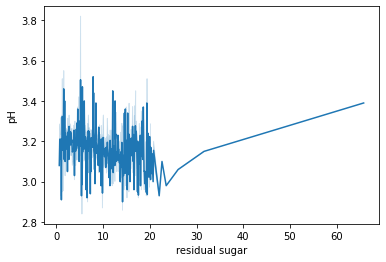

In [ ]:
#Vizualising White Wine Dataset - Line chart - residual sugar vS pH
sns.lineplot(data=data1, x="residual sugar", y="pH")


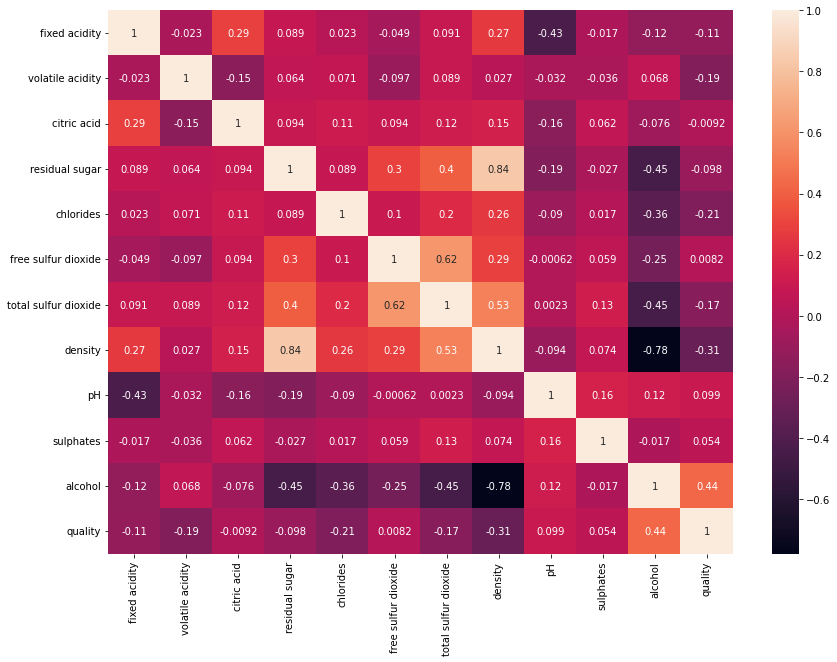

In [ ]:
#Visualising White Wine Dataset - Heat map
plt.figure(figsize=(14,10))
sns.heatmap(data1.corr(), annot= True);

#No Correlation between residual sugar and pH of white wine as the value is 
#-0.19. The same is indicated by the Line graph as well


In [ ]:
#Correlation for Red Wine Dataset
#Taking 0.7 as it is the strongest correlation possible 
for a in range(len(data.corr().columns)):
    for b in range(a):
        if abs(data.corr().iloc[a,b]>0.7):
            feature = data.corr(). columns[a]
            print(feature)


In [ ]:
#Correlation for White Wine Dataset
for a in range(len(data1.corr().columns)):
    for b in range(a):
        if abs(data1.corr().iloc[a,b]>0.7):
            feature = data1.corr().columns[a]
            print(feature)


density


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Labelling Red Wine Dataset based on quality score
from sklearn.preprocessing import LabelEncoder
bins = (1,5,10)
labels = ['Low', 'High']
data['quality'] = pd.cut(data['quality'], bins=bins, labels= labels)


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Low


In [ ]:
#Normalisation
label = LabelEncoder()
data['quality'] = label.fit_transform(data['quality'])
print(data.head())


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        1
1            7.8              0.88         0.00  ...       0.68      9.8        1
2            7.8              0.76         0.04  ...       0.65      9.8        1
3           11.2              0.28         0.56  ...       0.58      9.8        0
5            7.4              0.66         0.00  ...       0.56      9.4        1

[5 rows x 12 columns]


In [ ]:
#Splitting Dataset for training
data['quality'].value_counts()
y=data['quality']
data=data.drop('quality', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size = 0.25, random_state = 170)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test.ndim


2

In [ ]:
#Building Model - Logistic Regression - Red Wine 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 1500, random_state = 170).fit(x_train,y_train)
y_preds = logistic_model.predict(x_test)
matx = confusion_matrix(y_test,y_preds)
print(matx)
print(accuracy_score(y_test,y_preds))


[[134  50]
 [ 28 128]]
0.7705882352941177


In [ ]:
#Using trained Red Wine model to predict White Wine dataset
#Studying White Wine Dataset
print(data1.head())
print("Rows, columns :" + str(data1.shape))
data1.describe()
print(data1.info())


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]
Rows, columns :(4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   flo

In [ ]:
print(data1['quality'].value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [ ]:
#Labelling White Wine dataset based on quality score
bins = (1,5,10)
labels = ['Low', 'High']
data1['quality'] = pd.cut(data1['quality'], bins = bins, labels = labels)



In [ ]:
label = LabelEncoder()
data1['quality'] = label.fit_transform(data1['quality'])
y_test_n = data1['quality']
x_test_n = data1.drop('quality', axis= 1)

In [ ]:
#Building Model - Logistic Regression - White Wine
sc = StandardScaler()
x_test_n = sc.fit_transform(x_test_n)
y_preds_n = logistic_model.predict(x_test_n)
matx = confusion_matrix(y_test_n,y_preds_n)
print(matx)
print(accuracy_score(y_test_n, y_preds_n))


[[2273  985]
 [ 474 1166]]
0.7021233156390363
